In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
import matplotlib.style
plt.style.use('classic')

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
a = pd.read_csv('Firm_level_data.csv')

In [3]:
a.columns

Index(['Unnamed: 0', 'sales', 'capital', 'patents', 'randd', 'employment',
       'sp500', 'tobinq', 'value', 'institutions'],
      dtype='object')

In [4]:
a.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [5]:
#Dropped unnecessary column 'Unnamed'
a = a.drop('Unnamed: 0', axis = 1)

In [6]:
a.tail()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39
758,22.701999,14.244999,5,18.574360,0.197000,no,2.213070,18.940140,7.50


In [7]:
a.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [8]:
a.shape

(759, 9)

In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [10]:
a['sp500'] = a['sp500'].map(lambda x: 1 if x == 'yes' else 0)

In [11]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
sp500,759.0,0.285903,0.452141,0.000000,0.000000,0.000000,1.000000,1.000000
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


In [12]:
#For Datatype checking
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    int64  
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 53.5 KB


In [13]:
for column in a.columns:
    print(a[column].unique())
    print(a[column].value_counts())

[8.26995050e+02 4.07753973e+02 8.40784559e+03 4.51000010e+02
 1.74927981e+02 7.58120012e+01 5.23389972e+01 8.71680037e+01
 2.95288967e+02 1.56946033e+02 3.72245032e+02 3.66117944e+02
 6.15500022e+00 1.64827966e+03 2.63099964e+01 3.32770065e+03
 8.50557554e+03 5.55086911e+02 5.08549998e+01 1.14798991e+03
 7.23199726e+03 1.10018689e+03 2.64780016e+01 8.58899937e+02
 2.36999984e+00 7.75328965e+02 2.17987985e+02 1.40279036e+02
 2.19830981e+02 2.22642991e+02 1.68053181e+03 5.85158615e+03
 1.03960996e+02 4.27680263e+03 1.41730057e+04 1.30920017e+02
 1.76996396e+03 5.38534081e+02 5.08580069e+01 1.11820012e+01
 4.53356898e+02 1.37384216e+03 2.53359919e+04 3.45058604e+03
 1.57010042e+04 6.66319036e+02 1.73556997e+02 4.30820064e+02
 3.97240015e+01 1.37999992e-01 1.15052997e+04 7.97695515e+03
 3.35898069e+02 9.81136393e+03 3.19200091e+03 1.61740008e+01
 1.66400028e+03 2.53558361e+03 1.93940046e+03 1.73635807e+03
 1.72800995e+02 1.41215001e+03 3.22680002e+01 1.71889953e+04
 4.20262989e+02 2.608699

0.000000     92
88.254639     1
10.259757     1
27.972246     1
0.184639      1
             ..
23.335045     1
30.497925     1
14.311391     1
12.162350     1
18.574360     1
Name: randd, Length: 668, dtype: int64
[2.30600001e+00 1.86000002e+00 4.96590048e+01 3.07100023e+00
 1.94700004e+00 6.99999982e-01 5.70999986e-01 4.41000007e-01
 1.49399998e+00 6.37000027e-01 1.58200000e+00 2.46199987e+00
 5.09999950e-02 1.20599995e+01 2.15000002e-01 1.40749992e+01
 6.06999989e+01 5.28600008e+00 9.72999990e-01 8.60000038e+00
 4.39000067e+01 6.10000025e+00 4.49999976e-01 4.74899989e+00
 1.80999987e-01 4.89999991e+00 1.49999998e+00 5.27000002e-01
 1.07799995e+00 1.89999997e+00 5.55199975e+00 1.01730004e+01
 5.50000016e-01 2.65499963e+01 6.44930093e+01 1.20000004e+00
 3.66000023e+01 1.98599994e+00 6.15999988e-01 1.19999995e-01
 2.86800015e+00 3.06500000e+00 4.63169999e+01 2.68999971e+01
 1.18899981e+02 5.30000014e+00 1.05999994e+00 2.92399990e+00
 1.54000005e-01 4.59999960e-02 4.33450064e+01 1.49379

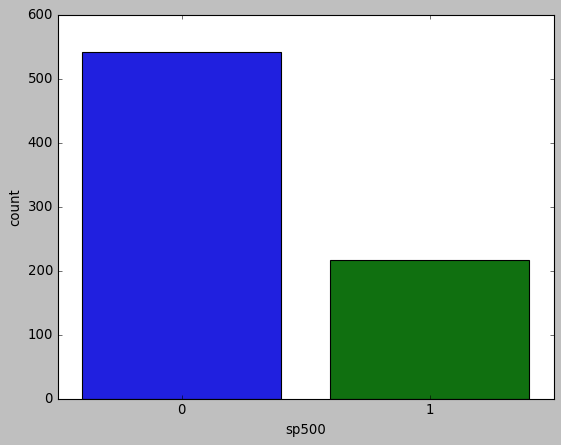

In [14]:
sns.countplot(a['sp500'])
plt.show()

In [15]:
a.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,0,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,0,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,1,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,0,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,0,1.063300,67.406408,49.46


In [16]:
a2 = a.drop('sp500', axis=1)

In [17]:
a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   tobinq        738 non-null    float64
 6   value         759 non-null    float64
 7   institutions  759 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 47.6 KB


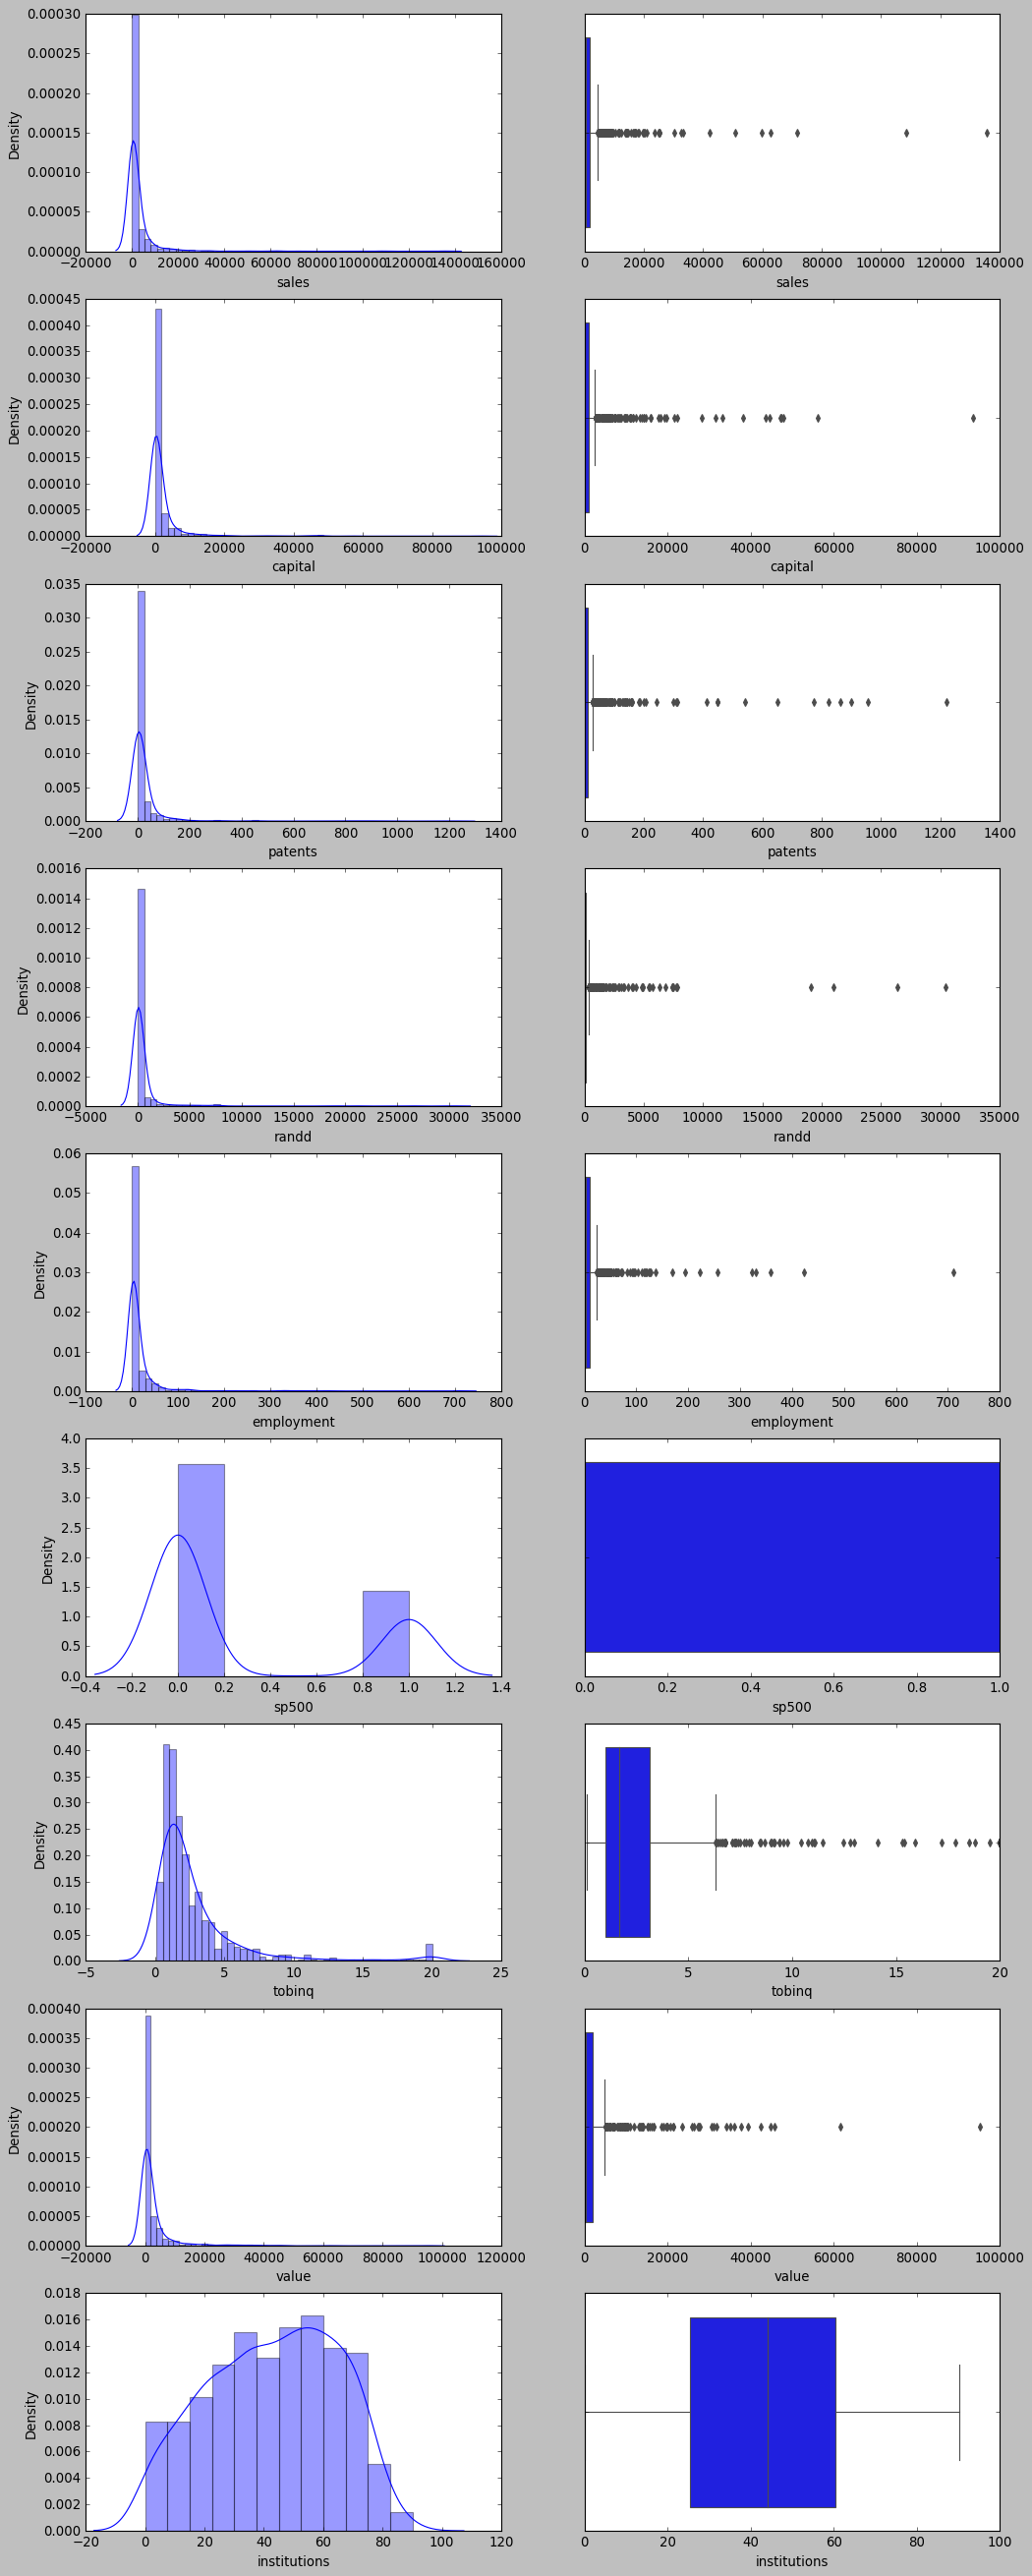

In [18]:
l = len(a.columns)
n = 1
fig = plt.figure(figsize=(15,40))
for column in a.columns:
        plt.subplot(l, 2, n)
        plt.xlabel(column)
        sns.distplot(a[column], hist_kws= dict(ec = 'black'))
        n = n + 1
        plt.subplot(l, 2, n)
        plt.xlabel(column)
        sns.boxplot(x = a[column])
        n = n + 1

In [19]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    int64  
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 53.5 KB


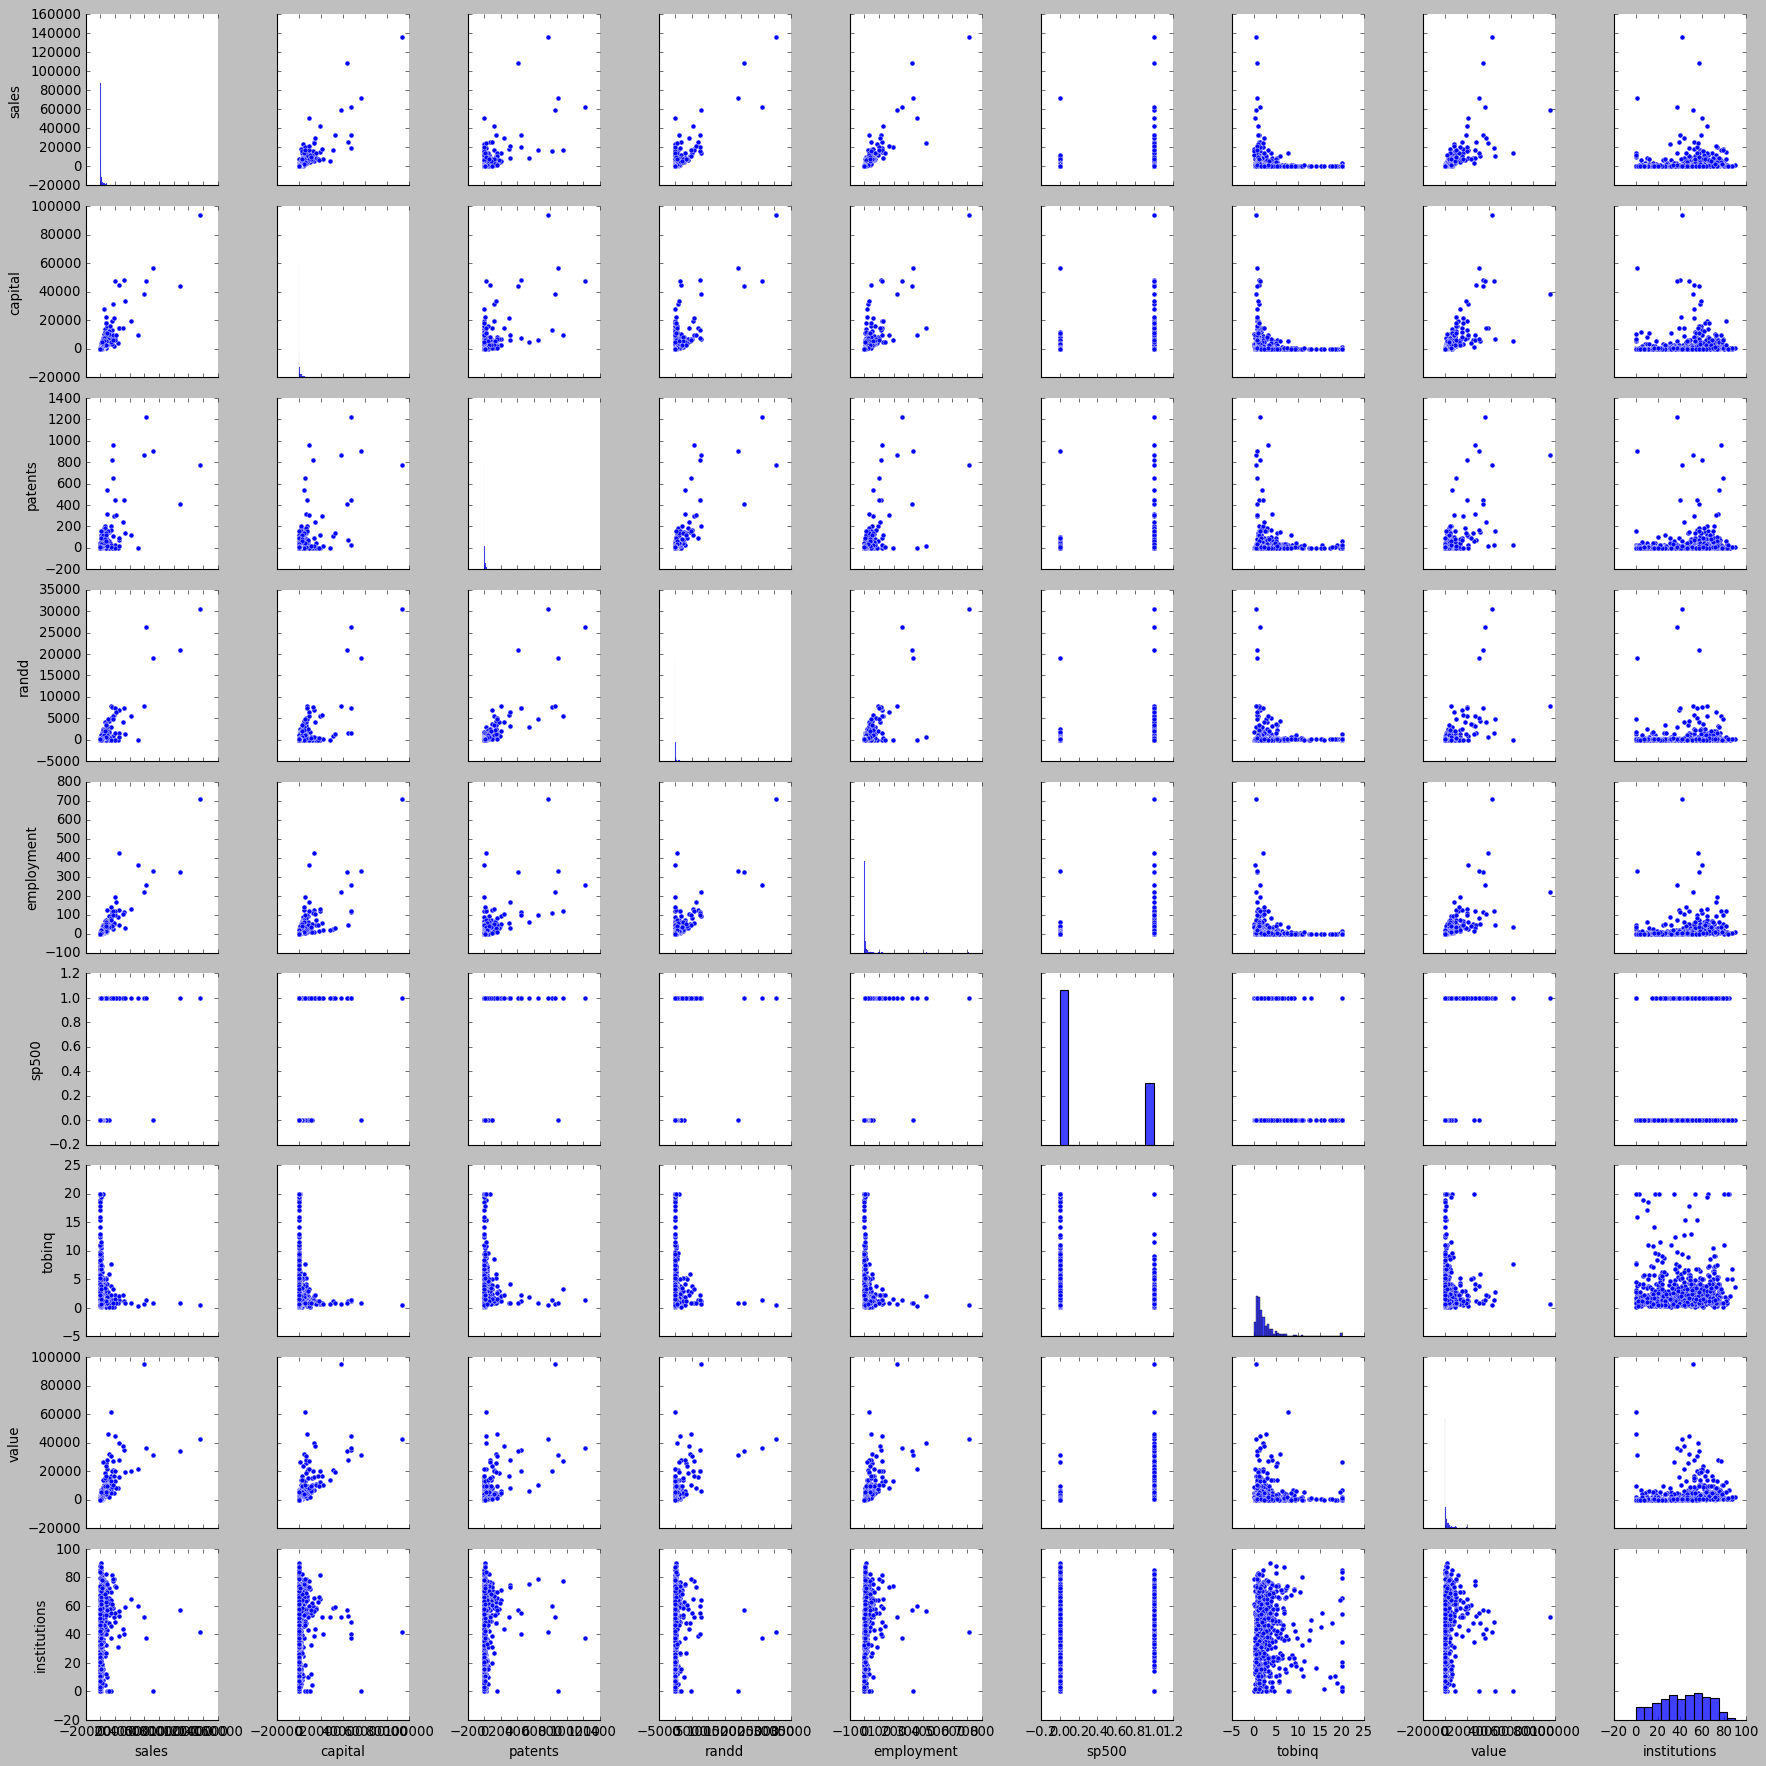

In [20]:
sns.pairplot(a[['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq','value', 'institutions']])
plt.show()

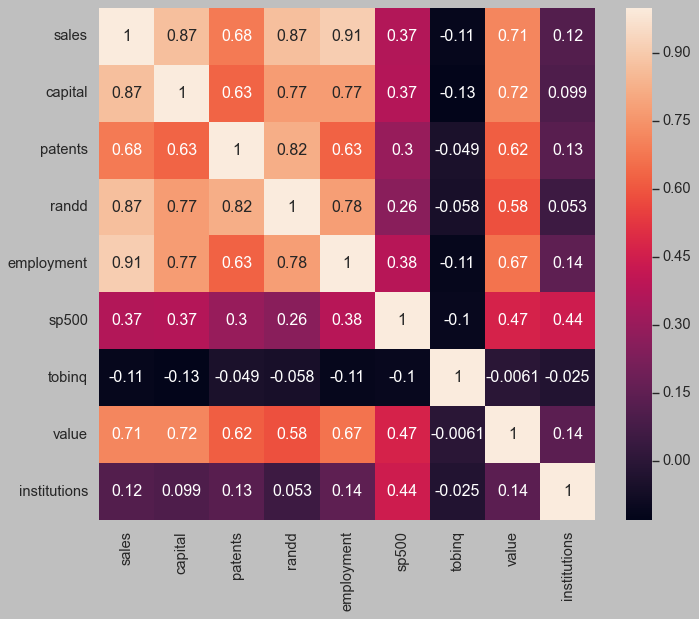

In [21]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(a[['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq','value', 'institutions']].corr(), annot=True)
plt.show()

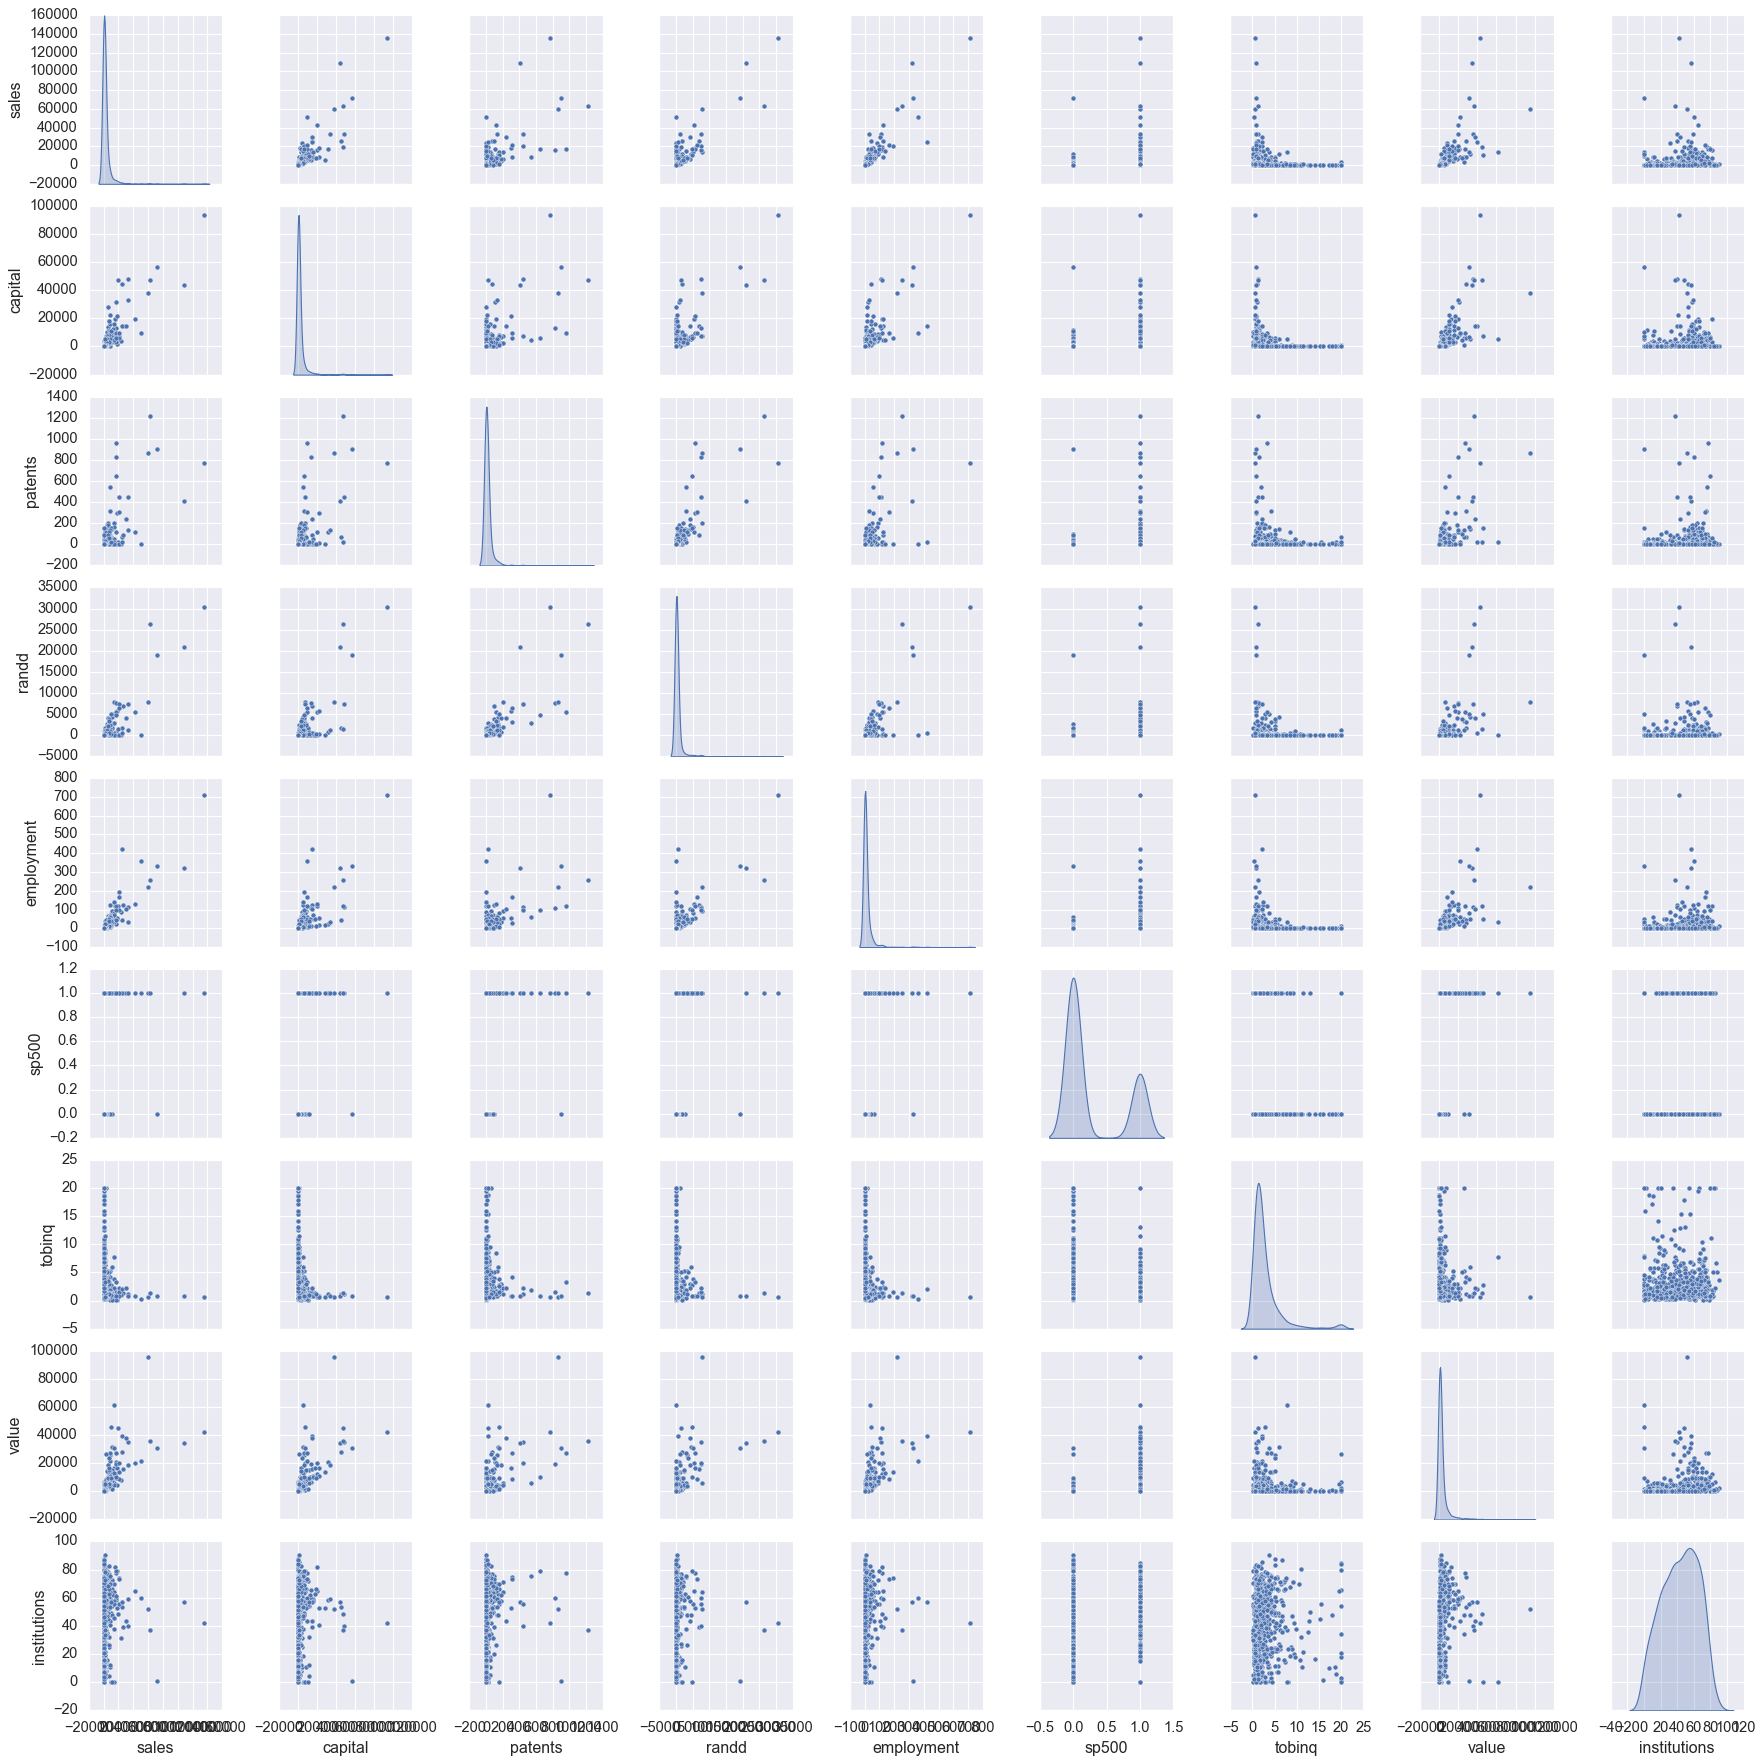

In [22]:
#Pairplot
a.iloc[:, 0:10]
sns.pairplot(a,diag_kind='kde')
plt.show()

# Null Value Treatment

In [23]:
a.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [24]:
a = a.apply(lambda x: x.fillna(x.median()),axis=0)

In [25]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    int64  
 6   tobinq        759 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 53.5 KB


# Outlier Treatment

In [26]:
Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
((a > UL) | (a < LL)).sum()

sales           100
capital         121
patents         122
randd           114
employment      103
sp500             0
tobinq           67
value            96
institutions      0
dtype: int64

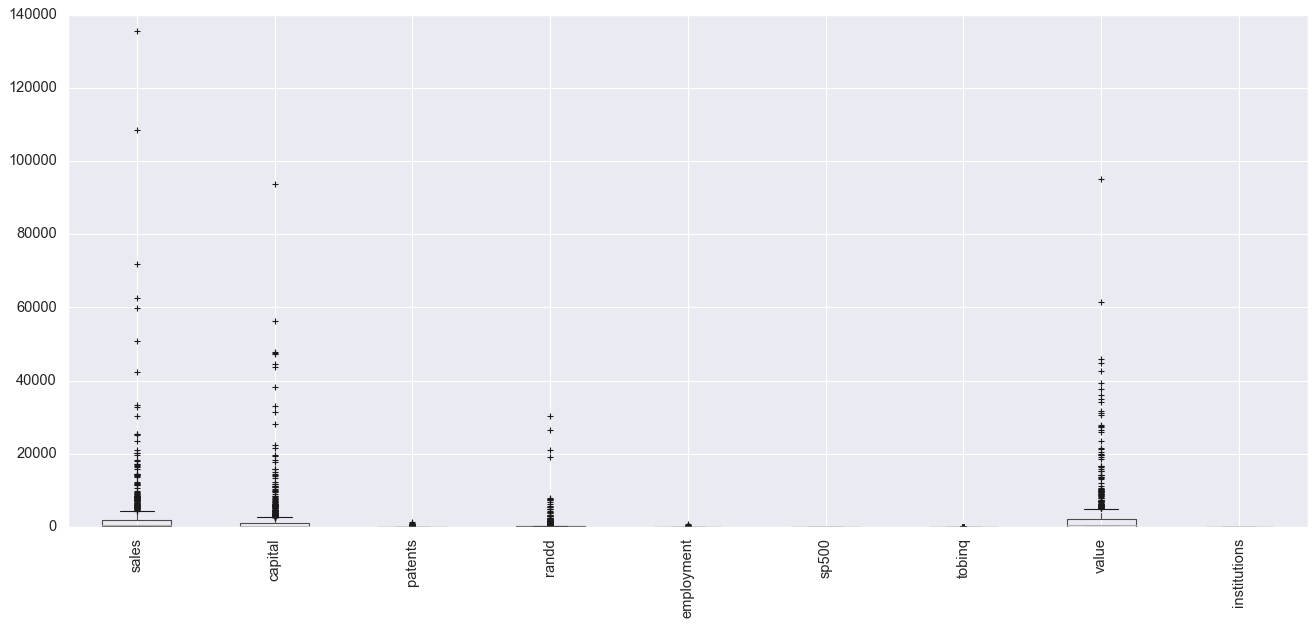

In [27]:
plt.figure(figsize = (20,8))
a.boxplot(rot = 90);

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [29]:
for column in a.columns:
    if (a[column].dtype != 'O') :
        a[column] = a[column].astype(int)
        lr,ur = remove_outlier(a[column])
        a[column]=np.where(a[column]>ur,ur,a[column])
        a[column]=np.where(a[column]<lr,lr,a[column])

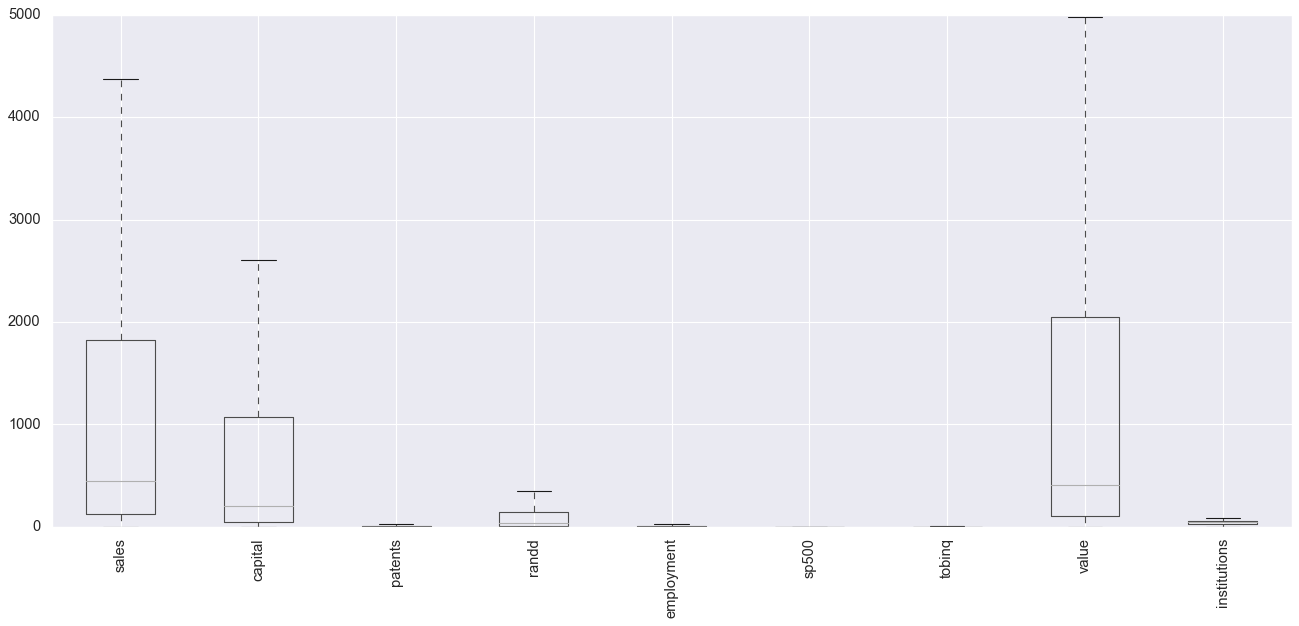

In [30]:
plt.figure(figsize = (20,8))
a.boxplot(rot = 90);

# Train - Test Split

In [31]:
X = a.drop('sales', axis=1)
y = a[['sales']]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1 )

In [34]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [35]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.40695504390920023
The coefficient for patents is -4.672408588719046
The coefficient for randd is 0.6568588577973116
The coefficient for employment is 73.16442024702089
The coefficient for sp500 is 182.39778737538043
The coefficient for tobinq is -41.79421805956599
The coefficient for value is 0.2442051292102374
The coefficient for institutions is 0.5694371405664665


In [36]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 89.59971563179124


In [37]:
regression_model.score(X_train, y_train)

0.9357156436246878

In [38]:
regression_model.score(X_test, y_test)

0.9244167412828321

In [39]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions,sales
626,1315.0,15.0,73.0,16.0,0.0,1.0,2231.0,31.0,1947.0
333,15.0,2.0,9.0,0.0,0.0,0.0,9.0,21.0,60.0
257,538.0,20.0,87.0,6.0,0.0,2.0,1019.0,69.0,1065.0
173,807.0,0.0,68.0,7.0,1.0,3.0,2221.0,69.0,1193.0
242,402.0,2.0,0.0,1.0,0.0,2.0,358.0,85.0,164.0


In [40]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [41]:
import math
print("RMSE for the Test Data",math.sqrt(mse))

RMSE for the Test Data 398.96673210964946


In [42]:
mse = np.mean((regression_model.predict(X_train)-y_train)**2)

In [43]:
import math
print("RMSE for the Training Data",math.sqrt(mse))

RMSE for the Training Data 395.10352669386776


In [44]:
y_pred = regression_model.predict(X_test)

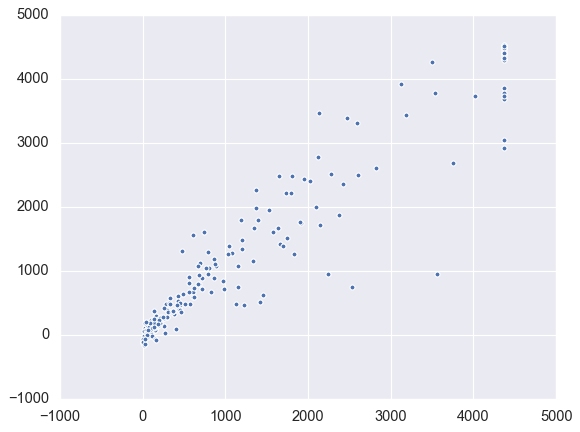

In [45]:
plt.scatter(y_test['sales'], y_pred)
plt.show()

In [46]:
a.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

# Backward Elimination

In [47]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'sales ~ capital+patents+randd+employment+sp500+tobinq+value+institutions', data = data_train).fit()
lm1.params

Intercept        89.599716
capital           0.406955
patents          -4.672409
randd             0.656859
employment       73.164420
sp500           182.397787
tobinq          -41.794218
value             0.244205
institutions      0.569437
dtype: float64

In [48]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     949.8
Date:                Fri, 14 Jan 2022   Prob (F-statistic):          2.05e-305
Time:                        14:04:19   Log-Likelihood:                -3928.4
No. Observations:                 531   AIC:                             7875.
Df Residuals:                     522   BIC:                             7913.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       89.5997     44.391      2.018   

In [49]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'sales ~ capital+patents+randd+employment+sp500+tobinq+value', data = data_train).fit()
lm2.params

Intercept     109.345346
capital         0.405582
patents        -4.522383
randd           0.658048
employment     73.350019
sp500         190.170251
tobinq        -41.599839
value           0.244740
dtype: float64

In [50]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1087.
Date:                Fri, 14 Jan 2022   Prob (F-statistic):          7.31e-307
Time:                        14:04:19   Log-Likelihood:                -3928.6
No. Observations:                 531   AIC:                             7873.
Df Residuals:                     523   BIC:                             7907.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.3453     31.497      3.472      0.0

In [51]:
import statsmodels.formula.api as smf
lm3 = smf.ols(formula= 'sales ~ capital+randd+employment+sp500+tobinq+value', data = data_train).fit()
lm3.params

Intercept     106.109637
capital         0.410425
randd           0.422853
employment     72.582140
sp500         180.478271
tobinq        -43.730784
value           0.243788
dtype: float64

In [52]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1263.
Date:                Fri, 14 Jan 2022   Prob (F-statistic):          7.40e-308
Time:                        14:04:19   Log-Likelihood:                -3929.9
No. Observations:                 531   AIC:                             7874.
Df Residuals:                     524   BIC:                             7904.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    106.1096     31.484      3.370      0.0

# Iteration 2

In [53]:
from scipy.stats import zscore

X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [54]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [55]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.25562996533467913
The coefficient for patents is -0.030288836518586663
The coefficient for randd is 0.05366356278813676
The coefficient for employment is 0.413206639209281
The coefficient for sp500 is 0.053112632061698334
The coefficient for tobinq is -0.048317963335499745
The coefficient for value is 0.2752477926572372
The coefficient for institutions is 0.007933921954478595


In [56]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.0119512621673827e-17


In [57]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9357156436246878

In [58]:
mse = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)

In [59]:
import math
print("RMSE for the Training Data",math.sqrt(mse))

RMSE for the Training Data 0.2535435985689881


In [60]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9256872194275775

In [61]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [62]:
import math
print("RMSE for the Test Data",math.sqrt(mse))

RMSE for the Test Data 0.2726037060871009


In [63]:
y_pred = regression_model.predict(X_test_scaled)

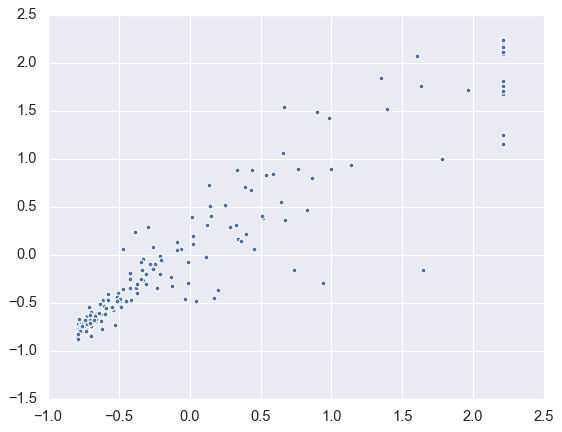

In [65]:
plt.scatter(y_test_scaled['sales'], y_pred)
plt.show()

# END